Yi Tang & Chenxi Yang 

# DATA 586 Project 1

In this mini project 1, we work on differentiating squares, circles, and triangles with CNN models from 300 images where the images come from https://www.kaggle.com/cactus3/basicshapes.

*Note: this .ipynb runs at Google Colaboratory.*


### Import packages 

In [0]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from zipfile import ZipFile
import imageio as im

# Check that we are using a GPU, if not switch runtimes
# using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

### Load data

Our dataset `shapes` contains 300 plots of three kinds of geometric figures that include squares, circles and triangles. For each category, there are 100 plots respectively. 

Please upload `shapes.zip` and run following codes.

In [0]:
file_name = "shapes.zip"
with ZipFile(file_name,'r') as zipfile:
  zipfile.extractall()
  print("Done")

Done


An example plot is shown below to indicate what kind of figures we are working on.

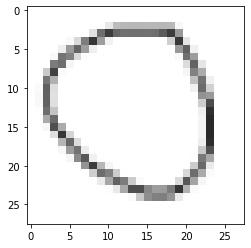

In [0]:
img = im.imread('/content/shapes/circles/drawing(1).png')
plt.imshow(img, cmap=plt.cm.binary)

### Prepare data

First of all, we construct a function to collect `png` into a list using `imread`.

In [0]:
def pic(dataname):
  data = []
  for i in range(1,101):
    img = im.imread("/content/shapes/{}/drawing({}).png".format(dataname, i))
    data.append(img)
  return np.array(data)

Then, different types of figures are appended into three lists. We construct three `label`(1, 2, 3) to represent `circles`, `squares` and `triangles` respectively. 

In [0]:
circles = pic(dataname = "circles")
squares = pic(dataname = "squares")
triangles = pic(dataname = "triangles")

images = np.vstack((circles, squares, triangles))

label_name = np.array(["circles", "squares", "triangles"])
labels_name = np.repeat(label_name, 100)
label = np.array([1,2,3])
labels = np.repeat(label, 100)

In [0]:
np.random.seed(586)
inds_train = np.random.choice(300, 240, replace=False)
inds_test = np.delete(np.array(range(0,300)), inds_train)

Next, our job is to split the total dataset into training set and test set. Of the entire dataset, we select 80% as training set and 20% as test set.

Our training set is made up of 240 `28x28` grayscale images of handwritten digits.

In [0]:
train_images = images[inds_train]
train_images = (train_images/255).astype(np.float32)
train_labels_name = labels_name[inds_train]
train_labels = labels[inds_train]
train_labels = (train_labels).astype(np.int64)

Our test set is made up of 60 `28x28` grayscale images of handwritten digits.

In [0]:
test_images = images[inds_test]
test_images = (test_images/255).astype(np.float32)
test_labels_name = labels_name[inds_test]
test_labels = labels[inds_test]
test_labels = (test_labels).astype(np.int64)

Example training plots are shown below.

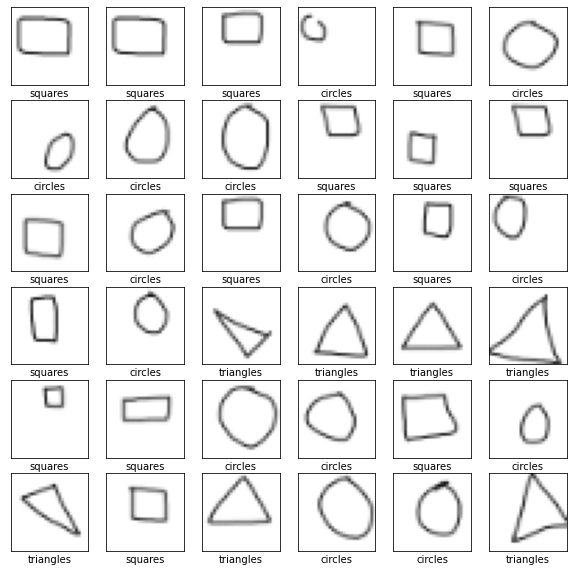

In [0]:
np.random.seed(586)
plt.figure(figsize = (10,10))
random_inds = np.random.choice(240,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap = plt.cm.binary)
    plt.xlabel(train_labels_name[image_ind])

### Define the CNN model

We now build a CNN model that is composed of two convolutional layers and two pooling layers using `relu` activation, followed by the fully connected layers, and ultimately output a probability distribution over the 3 digit classes (1, 2, 3). 

As mentioned above, three digit classes (1, 2, 3) represent circle, square and triangle respectively. 

In [0]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24,kernel_size=(3,3),activation=tf.nn.relu), 

        # Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu),

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # Dense layer to output classification probabilities
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model

cnn_model = build_cnn_model()

# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])

# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  6944      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  102528    
_________________________________________________________________
dense_1 (Dense)              multiple                  1

### Train and test the CNN model

We try different optimizers with different learning rate. After comparing all accuracies, we choose the optimizer `RMSprop`, the learning rate `0.001`, the loss function `sparse_categorical_crossentropy` and the metrics `accuracy`.

In [0]:
cnn_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

`batch_size`: Number of samples per gradient update. 

`epochs`: Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

Since the dataset size is too small, we use batch_size = 40 and epochs = 80, and call `fit` function to train the model.

In [0]:
BATCH_SIZE = 40
EPOCHS = 80

cnn_model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/80
6/6 [==============================] - 0s 3ms/step - loss: 1.5703 - accuracy: 0.3208
Epoch 2/80
6/6 [==============================] - 0s 3ms/step - loss: 1.2024 - accuracy: 0.3625
Epoch 3/80
6/6 [==============================] - 0s 3ms/step - loss: 1.1935 - accuracy: 0.3333
Epoch 4/80
6/6 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.5083
Epoch 5/80
6/6 [==============================] - 0s 3ms/step - loss: 1.0798 - accuracy: 0.4083
Epoch 6/80
6/6 [==============================] - 0s 3ms/step - loss: 1.1779 - accuracy: 0.3917
Epoch 7/80
6/6 [==============================] - 0s 3ms/step - loss: 1.0467 - accuracy: 0.5083
Epoch 8/80
6/6 [==============================] - 0s 3ms/step - loss: 1.0113 - accuracy: 0.4833
Epoch 9/80
6/6 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.4792
Epoch 10/80
6/6 [==============================] - 0s 3ms/step - loss: 1.0111 - accuracy: 0.4625
Epoch 11/80
6/6 [======================

Evaluate the model on the test dataset using `evaluate` function.

In [0]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 19ms/step - loss: 0.3201 - accuracy: 0.9333
Test accuracy: 0.9333333373069763


The accuracy of our CNN model is about 0.0.9333333373069763.

### Make predictions with the CNN model

After training and testing the accuracy of the CNN model, the next step is to predict the category of images.

In [0]:
predictions = cnn_model.predict(test_images)

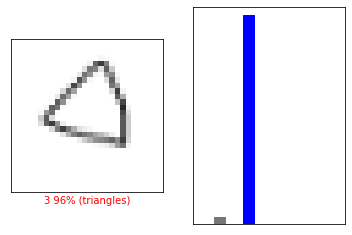

In [0]:
image_index = 47 #@param {type:"slider", min:0, max:60, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels_name, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions, test_labels)

In order to observe whether our model works well, we plot 60 test images with their predicted labels and the true labels.

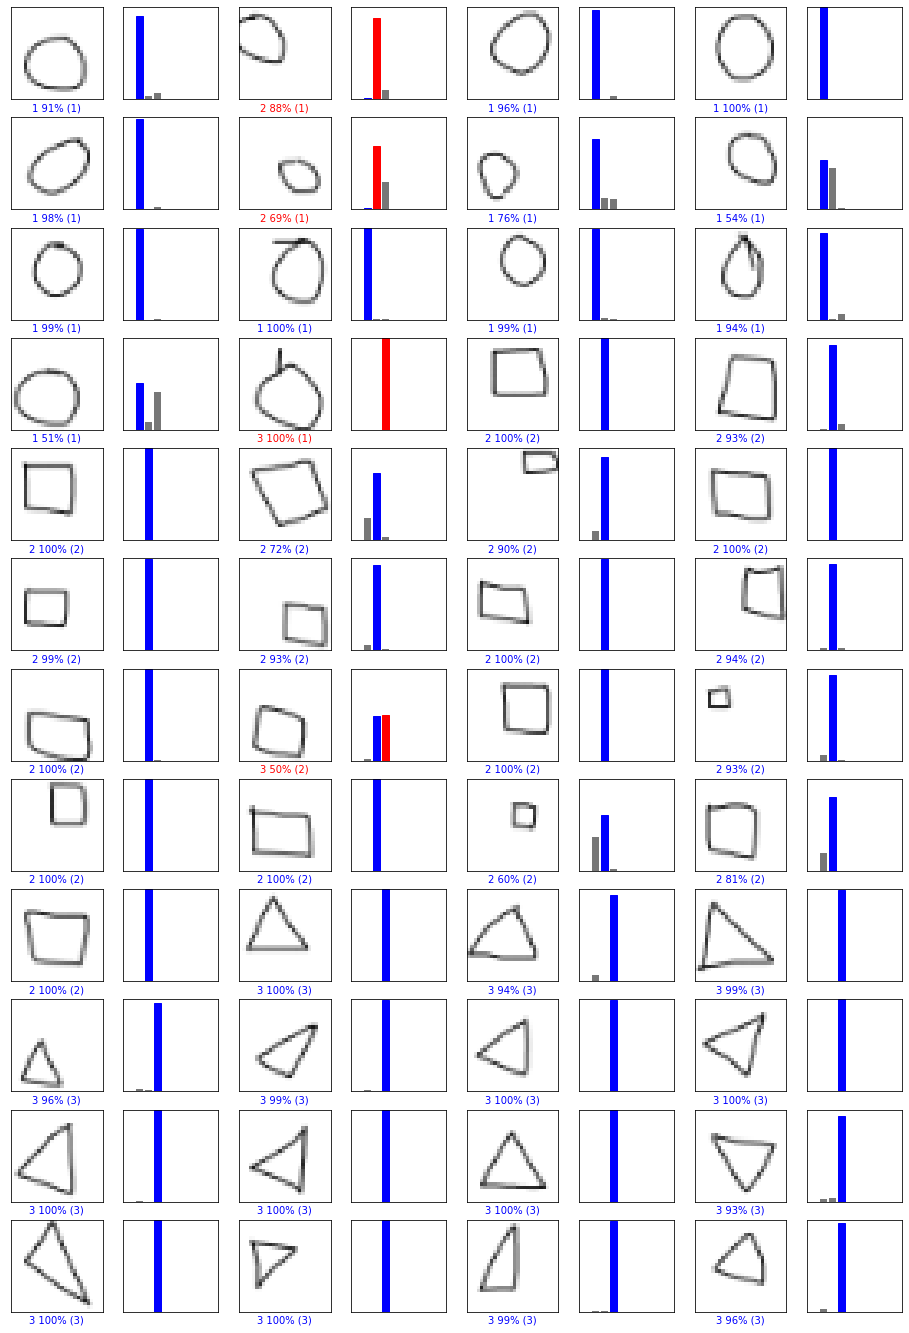

In [0]:
num_rows = 12
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

According to the result above, there are 4 incorrect classified figures among 60 images in the CNN model.

### Train and test the CNN model 2.0

For the purpose of exploring more in the world of CNN, we construct another CNN model using `tf.GradientTape` to record differentiation operations during training, and then call the `tf.GradientTape.gradient` function to actually compute the gradients.

Since the dataset is too small to do the training, we randomly choose 12800 out of 240 with replacement as the training dataset.

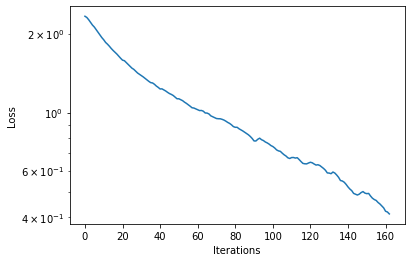

100%|██████████| 320/320 [00:04<00:00, 76.47it/s]


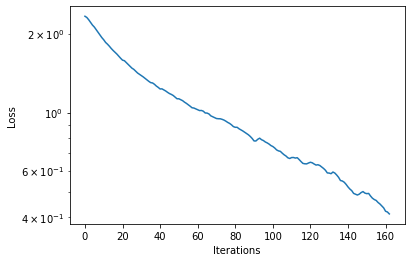

In [0]:
np.random.seed(586)

# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 40

# Record the evolution of the loss
loss_history = mdl.util.LossHistory(smoothing_factor = 0.95)
plotter = mdl.util.PeriodicPlotter(sec = 2, xlabel = 'Iterations', ylabel = 'Loss', scale = 'semilogy')

# Define our optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001) 

# Clear if it exists
if hasattr(tqdm, '_instances'): tqdm._instances.clear() 

inds = np.random.choice(240,12800)
new_train_images=train_images[inds]
new_train_labels=train_labels[inds]

for idx in tqdm(range(0, new_train_images.shape[0], batch_size)):
  
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (new_train_images[idx:idx+batch_size], new_train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    
    # Feed the images into the model and obtain the predictions
    logits = cnn_model(images) 

    # Compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) 
  
  # Append the loss to the loss_history record  
  loss_history.append(loss_value.numpy().mean()) 
  plotter.plot(loss_history.get())

  # Backpropagation
  # Use the tape to compute the gradient against all parameters in the CNN model.
  # Use cnn_model.trainable_variables to access these parameters.
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

In this case, we choose the same features of `cnn_model.compile`, which are the optimizer `RMSprop`, the learning rate `0.001`, the loss function `sparse_categorical_crossentropy` and the metrics `accuracy`.

In [0]:
cnn_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Evaluate the model on the test dataset using `evaluate` function.

In [0]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8833
Test accuracy: 0.8833333253860474


The accuracy of our CNN model 2.0 is about 0.8833333253860474.

### Make predictions with the CNN model 2.0

We use this CNN model to do the prediction again.

In [0]:
predictions = cnn_model.predict(test_images)

Plot 60 test images with their predicted labels and the true labels.

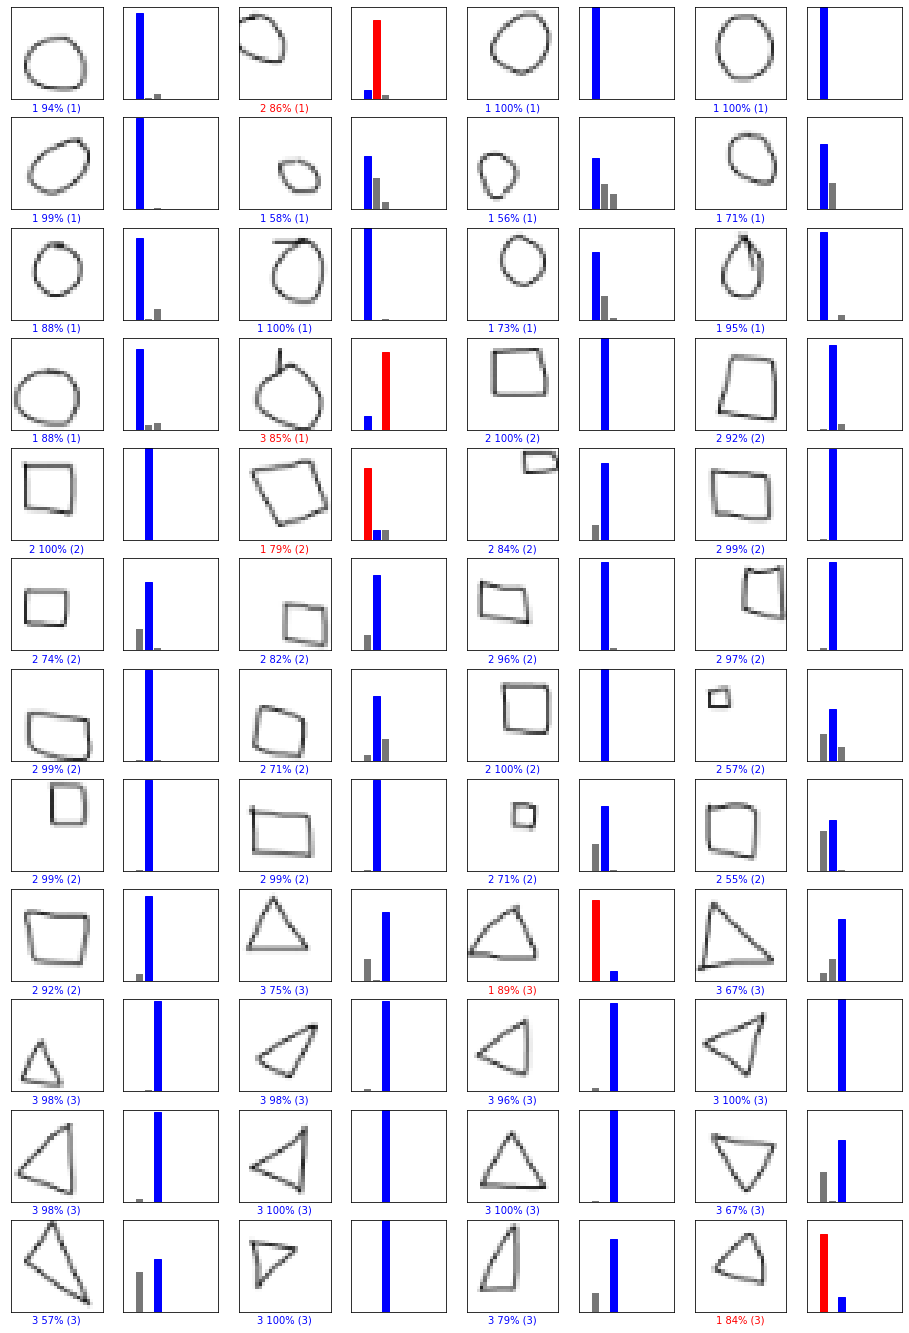

In [0]:

num_rows = 12
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

According to the result above, there are 5 incorrect classified figures among 60 images in the CNN model 2.0. One more image is inappropriately classified.

### Conclusion

**Convolutional Neural Networks**, or CNNs, were designed to map image data to an output variable. The main advantage of CNNs is that they are able to develop an internal representation of a two-dimensional image.

In this mini project 1, we construct two CNN models on differentiating squares, circles, and triangles. According to the result above, we conclude that the CNN model using `fit` function performs better than the CNN model using `stochastic gradient descent` on our dataset as it has higher accuracy, which may indicate that the CNN model using `fit` function is more suitable for the small dataset than the CNN model using `stochastic gradient descent`.

In order to optimize the CNN model using `stochastic gradient descent`,  a larger dataset is required than the CNN model using `fit` function to obtain the same accuracy. 

The CNN model is significant in working with images as it is effective on any type of prediction problem involving image data as an input, which can learn position and scale in variant structures in the data.

